![ine-divider](https://user-images.githubusercontent.com/7065401/92672068-398e8080-f2ee-11ea-82d6-ad53f7feb5c0.png)
<hr>

# Seaborn statistical plots

Seaborn extends the capabilities of Matplotlib by providing high-level plotting methods for statistical analysis. It is also a set of style options for Matplotlib.

![orange-divider](https://user-images.githubusercontent.com/7065401/92672455-187a5f80-f2ef-11ea-890c-40be9474f7b7.png)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Types of plots

Seaborn is a high-level plotting library that accepts data in either *wide* or *tidy* column formats depending on the visualization technique.

## Single plots

The following methods return single plot objects that can combined with layout functions in Matplotlib or Seaborn.

* Scatter and regression plots
  * regplot, residplot
* Distribution plots
  * distplot, kdeplot, rugplot
* Categorical plots
  * boxplot, violinplot, striplot, swarmplot, barplot, countplot
* Matrix plots
  * heatmap
* Time series
  * tsplot

## Grid plots

Grid plots are made up from collections of *single plots*. These plots can be used to perform gorupby-like operations.

* Scatter and regression plots
  * lmplot
* Distribution plots
  * jointplot, pairplot
* Categorical plots
  * factorplot
* Matrix plots
  * clustermap
  
These methods allow a `size=` parameter.

Seaborn supports Pandas DataFrames as input to plot data in columns.

In [3]:
auto = pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


# Visualizing distributions

## Univariate distributions

**displot()** is a histogram with a kernel density estimation overlain.

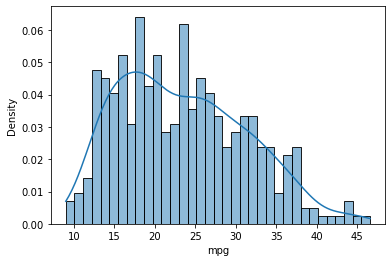

In [22]:
sns.histplot(auto['mpg'], kde=True, bins=35, stat='density');

## Bivariate distributions

2-dimensional distributions plotted with **jointplot()** include histograms.

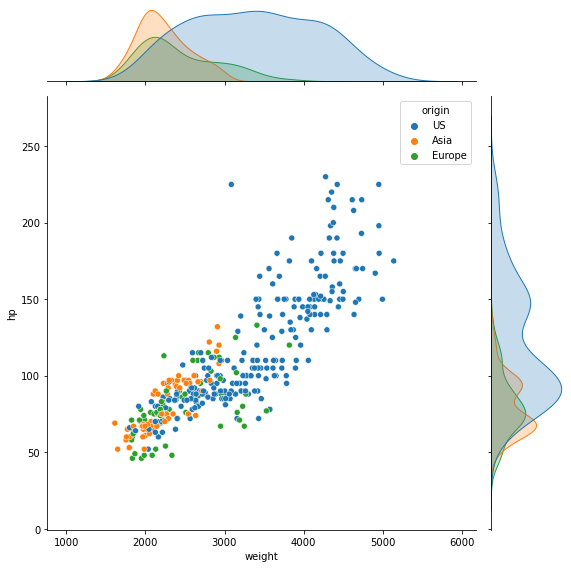

In [26]:
sns.jointplot(x='weight', y='hp', data=auto, height=8, hue='origin');

The `kind=` keyword paramter can adjust the display. Available options are
* `scatter` (default)
* `hex`: hexagonal binning
* `kde`: contour mapping
* `reg`: adding regressions and kde
* `resid`: deviations from regression

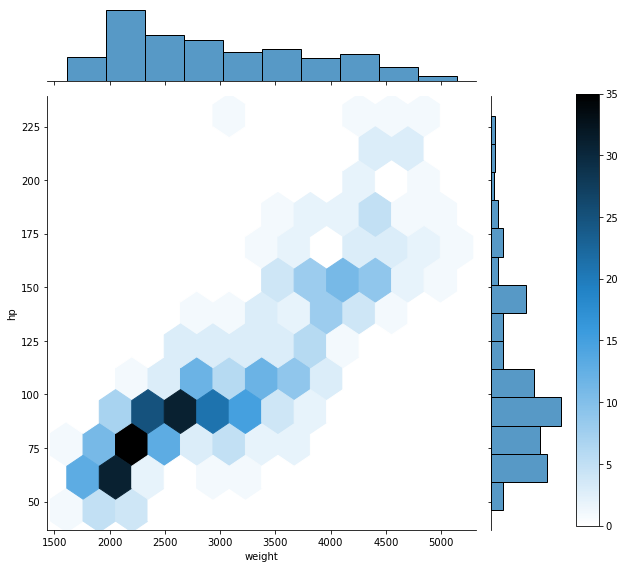

In [47]:
jp = sns.jointplot(x='weight', y='hp', kind='hex', data=auto, height=8)

# add colorbar
cax = jp.fig.add_axes([1, .08, .04, .75])
plt.colorbar(cax=cax);

### Regressions

Regressions of aribrary order are visualized with **regplot()**.

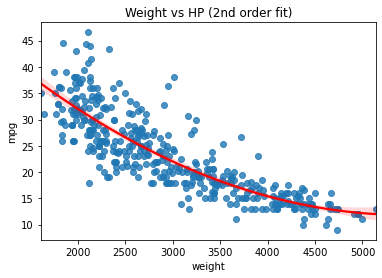

In [54]:
ax = sns.regplot(x='weight', y='mpg', order=2, 
                 line_kws={'color':'red'}, data=auto)
ax.set_title("Weight vs HP (2nd order fit)");

Sometimes we need to "drop down" to the Matplotlib level to adjust some features.  Here we make the underlying axis object larger.

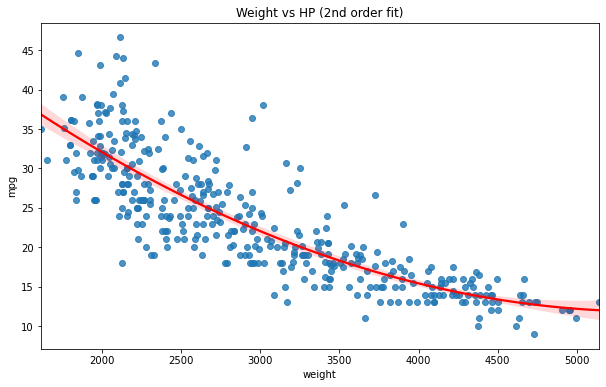

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='weight', y='mpg', order=2, ax=ax,
                 line_kws={'color':'red'}, data=auto)
ax.set_title("Weight vs HP (2nd order fit)");

### Factoring variables

**catplot()** plots distributions with groupby operations applied along the x-axis.<br>Secondary grouping is performed with `hue=`.

Multiple plots can be factored with `col=`.

The `kind=` keyword can be
* `point`
* `count`
* `bar`
* `box`
* `violin`
* `strip`

Simple grouping along the column on the x-axis.

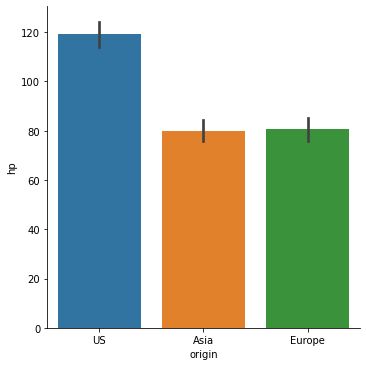

In [63]:
sns.catplot(x='origin', y='hp', kind='bar', data=auto, height=5);

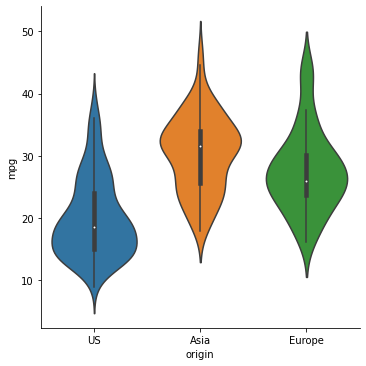

In [64]:
sns.catplot(x='origin', y='mpg', kind='violin', data=auto, height=5);

Let's also factor out the average horse-power per region and number of cylinders.

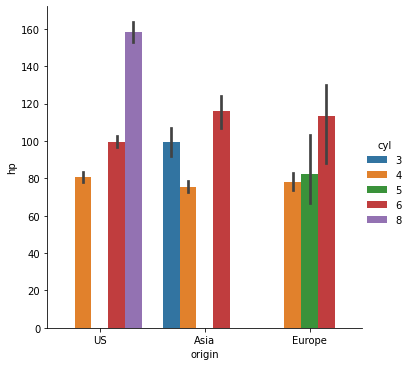

In [67]:
sns.catplot(x='origin', y='hp', hue='cyl', kind='bar', data=auto, height=5);

The US is the only manufacturer of 8-cylinder vehicles.

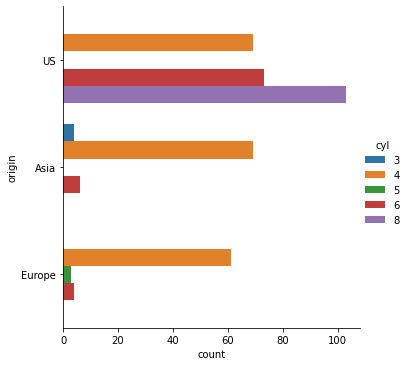

In [69]:
sns.catplot(y='origin', kind='count', hue='cyl', data=auto, height=5);

By binning the data set in 5-year increments we can further factor the plots into columns.

In [70]:
auto['bins'] = pd.cut(auto['yr'], bins=np.arange(65,90,5))
auto['bins'].value_counts().sort_index()

(65, 70]     29
(70, 75]    151
(75, 80]    154
(80, 85]     58
Name: bins, dtype: int64

The distributions have changed in Europe and Asia dramatically from 1970 to 1984.

The meadian MPG value has raised in the US during this time.

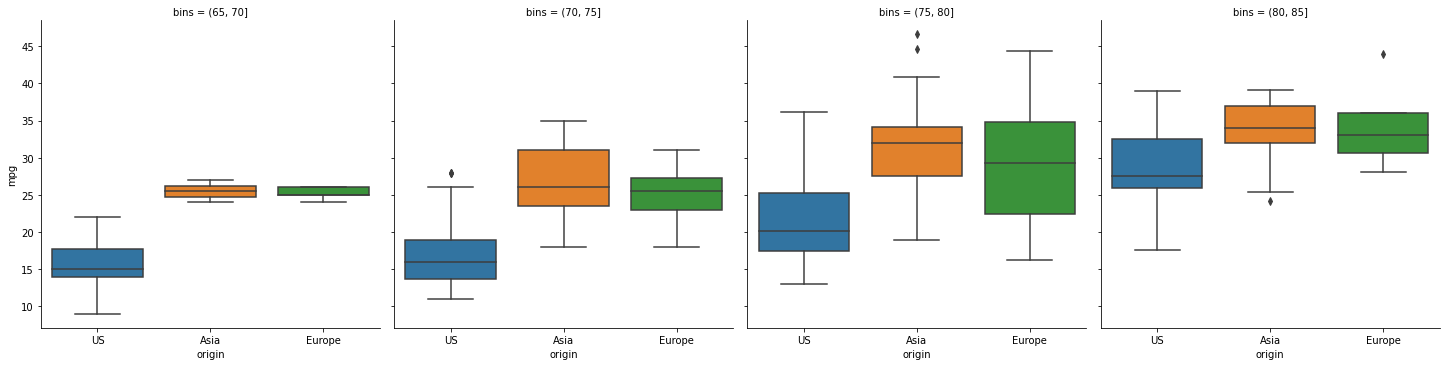

In [75]:
sns.catplot(x='origin', y='mpg', kind='box', col='bins', data=auto);

### Pairwise relationships

**pairplot()** performs a `jointplot()` over all pairs of columns. 

It is generally helpful to select only the columns you wish to plot from the DataFrame. `vars=` will also accept a list of column names.

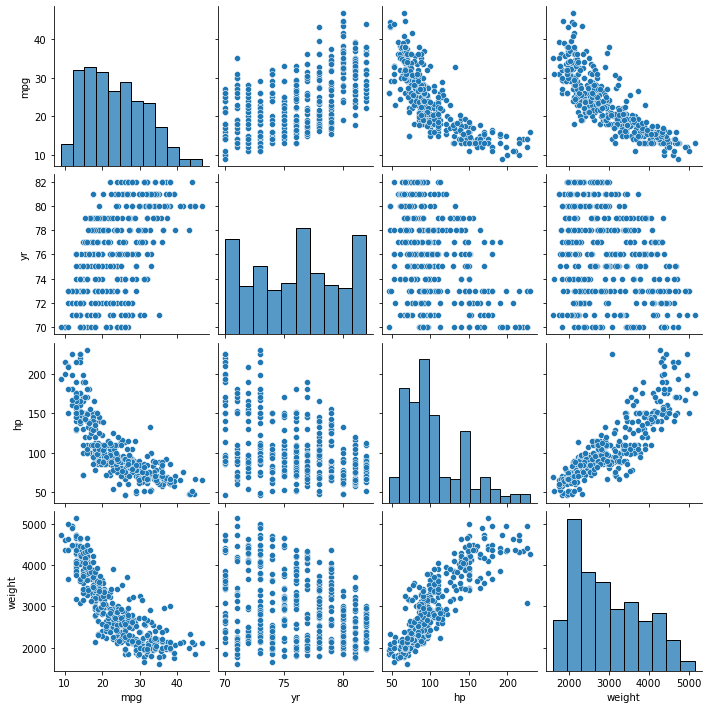

In [76]:
sns.pairplot(auto[['mpg','yr','hp','weight']]);

Like `factorplot`, `hue=` performs a groupby operation.

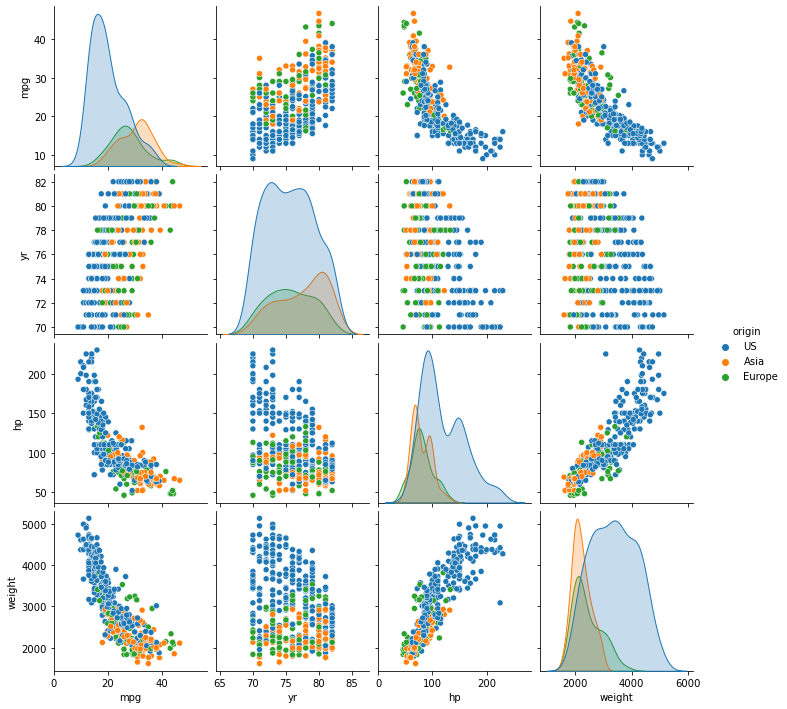

In [77]:
sns.pairplot(auto, vars=['mpg','yr','hp','weight'], hue='origin');

# Summary

* The single plot methods are similar Pandas `.plot()` methods
  * Can also plot regression models
* Grid plots allow groupby operations and ggplot-like visualizations
  * See [FacetGrid and PairGrid](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html)

# Exercise

<a href='./Seaborn_ex.ipynb' class='btn btn-primary btn-lg'>Exercise</a>